# Downloading dataset from Kaggle

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yasminamatruziyeva","key":"103a4d21f65171584d27daa1b596b21e"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d wwymak/architecture-dataset

100% 1.43G/1.43G [01:12<00:00, 18.9MB/s]
100% 1.43G/1.43G [01:12<00:00, 21.2MB/s]


In [7]:
!unzip architecture-dataset.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: arcDataset/Russian Revival architecture/476_402px-%D0%91%D0%BE%D0%BB%D0%B3%D0%B0%D1%80%D0%B8%D1%8F%2C_%D0%A8%D0%B8%D0%BF%D0%BA%D0%B8%D0%BD%D1%81%D0%BA%D0%B8%D0%B9_%D0%BF%D0%B5%D1%80%D0%B5%D0%B2%D0%B0%D0%BB.jpg  
  inflating: arcDataset/Russian Revival architecture/4840_600px-Cathedral_of_Christ_the_Saviour_3.jpg  
  inflating: arcDataset/Russian Revival architecture/4843_561px-Christ_the_Savior_Cathedral_Moscow.jpg  
  inflating: arcDataset/Russian Revival architecture/4848_683px-Moscow_July_2011-6a.jpg  
  inflating: arcDataset/Russian Revival architecture/4849_800px-Moscow_-_Cathedral_of_Christ_the_Saviour4.jpg  
  inflating: arcDataset/Russian Revival architecture/4853_471px-Moscow_-_Cathedral_of_Christ_the_Saviour.jpg  
  inflating: arcDataset/Russian Revival architecture/4874_683px-Moscow_July_2011-6a.jpg  
  inflating: arcDataset/Russian Revival architecture/4880_471px-Moscow_-_Cathedral_of_Christ_th

# Loading data

In [32]:
import tensorflow as tf
import matplotlib.pyplot as plt

data = tf.keras.utils.image_dataset_from_directory('/content/arcDataset/')

Found 4794 files belonging to 25 classes.


In [33]:
data_iterator = data.as_numpy_iterator()

In [34]:
batch = data_iterator.next()

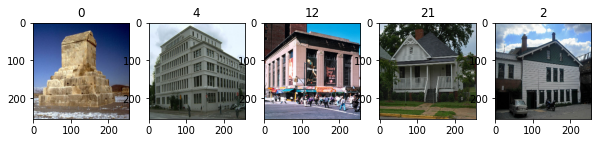

In [35]:
figure, ax = plt.subplots(ncols = 5, figsize=(10,10))
for idx, img in enumerate(batch[0][:5]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [36]:
scaled = batch[0]/255
scaled.min()
scaled.max()

1.0

# Preprocessing data

In [37]:
data = data.map(lambda x,y: (x/255,y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

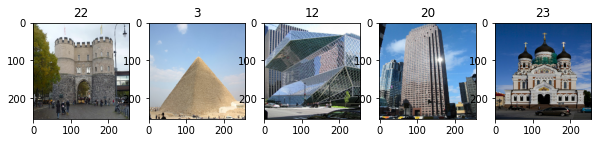

In [38]:
figure, ax = plt.subplots(ncols = 5, figsize=(10,10))
for idx, img in enumerate(batch[0][:5]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [48]:
print("Total number of batches:", len(data))
train_size = int(len(data)*.6)
valid_size = int(len(data)*.2)
test_size = int(len(data)*.2)
print(train_size)
print(valid_size)
print(test_size)

Total number of batches: 150
90
30
30


In [49]:
train = data.take(train_size)
valid = data.skip(train_size).take(valid_size)
test = data.skip(train_size + valid_size)

# Model

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Dropout(0.7))
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.7))
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.7))
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 127, 127, 16)      0         
                                                                 
 conv2d_22 (Conv2D)          (None, 125, 125, 64)      9280      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 62, 62, 64)       

# Training model

In [53]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=25, validation_data=valid, callbacks=[tensorboard_callback])

Epoch 1/25
90/90 [==============================] - 33s 332ms/step - loss: -937509440.0000 - accuracy: 0.0125 - val_loss: -7079951360.0000 - val_accuracy: 0.0083
Epoch 2/25
90/90 [==============================] - 36s 385ms/step - loss: -446752751616.0000 - accuracy: 0.0128 - val_loss: -1792215482368.0000 - val_accuracy: 0.0104
Epoch 3/25
90/90 [==============================] - 35s 383ms/step - loss: -15094947774464.0000 - accuracy: 0.0122 - val_loss: -39610449133568.0000 - val_accuracy: 0.0094
Epoch 4/25
90/90 [==============================] - 31s 339ms/step - loss: -159499784552448.0000 - accuracy: 0.0122 - val_loss: -327741740154880.0000 - val_accuracy: 0.0115
Epoch 5/25
90/90 [==============================] - 35s 384ms/step - loss: -893214617763840.0000 - accuracy: 0.0125 - val_loss: -1531894441181184.0000 - val_accuracy: 0.0115
Epoch 6/25
90/90 [==============================] - 31s 337ms/step - loss: -3431639677927424.0000 - accuracy: 0.0122 - val_loss: -5255135152308224.0000 

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, Binary Accuracy
precision = Precision()
recall = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator():
  x, y = batch
  that = model.predict(x)
  precision.update_state(y, yhat)
  recall.update_state(y, yhat)
  acc.update_state(y, yhat)